In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read week2.csv

data1=pd.read_csv('week2.csv')


In [4]:
# checking datatypes of columns

data1.dtypes

Unnamed: 0                  int64
Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
month                       int64
year                        int64
Day_Perc_Change           float64
Trend                      object
dtype: object

In [5]:
# converting datatype of Date column to datetime64[ns]

data1['Date']=pd.to_datetime(data1['Date'])
data1=data1.set_index('Date')


Text(0, 0.5, 'Close Price')

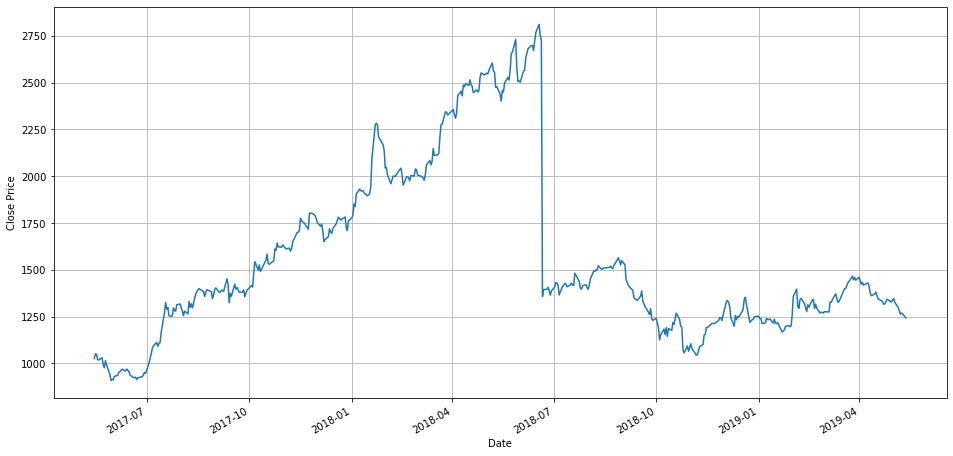

In [6]:
# plot of Close Price
plt.figure(figsize=(16, 8))
data1['Close Price'].plot(kind='line',rot=30,grid=True)
plt.xlabel('Date')
plt.ylabel('Close Price')


'In 06-2018 there was large drop in the share price of Jubilant Foodworks'

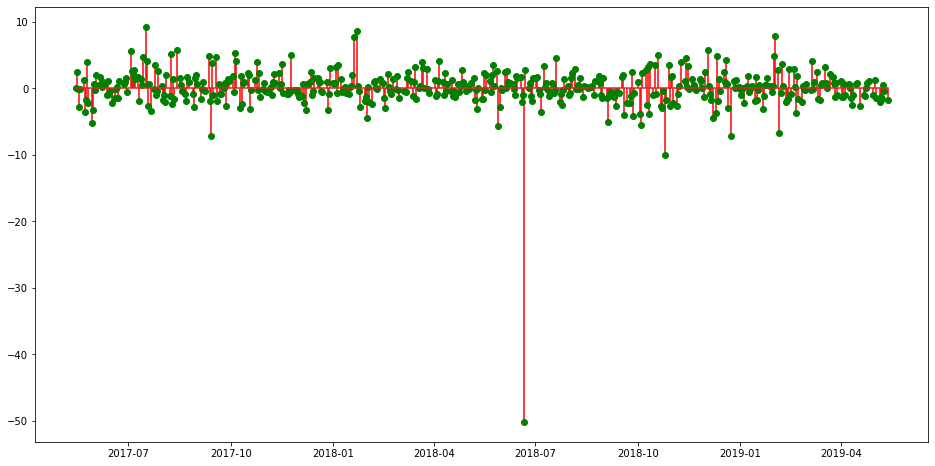

In [7]:
# Stem plot of Daily return

plt.figure(figsize=(16, 8))
plt.stem(data1.index,data1['Day_Perc_Change'],'r','go',use_line_collection=True)

'''In 06-2018 there was large drop in the share price of Jubilant Foodworks'''


Text(0, 0.5, 'Total Traded Quantity')

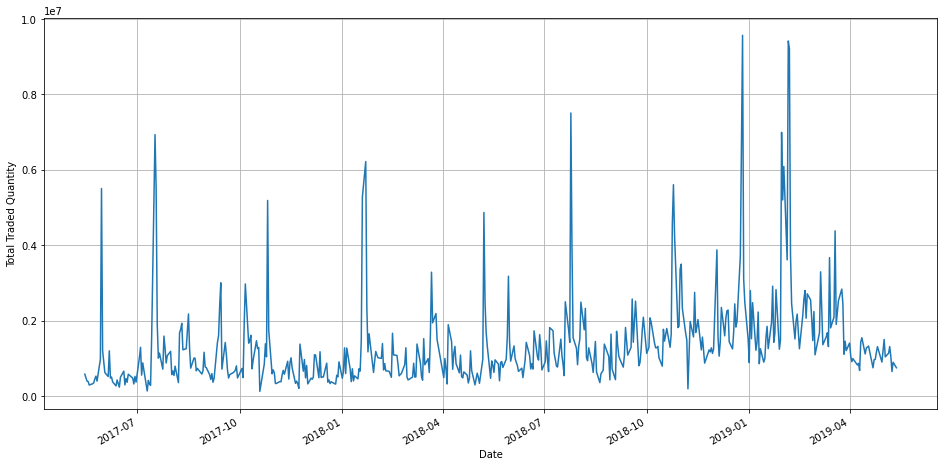

In [8]:
# plot of Daily volume

plt.figure(figsize=(16, 8))
data1['Total Traded Quantity'].plot(kind='line',rot=30,grid=True)
plt.xlabel('Date')
plt.ylabel('Total Traded Quantity')


'plot of Daily volume vs stem plot of daily return shows that whenever there is large change in daily return the number of trades is also increased '

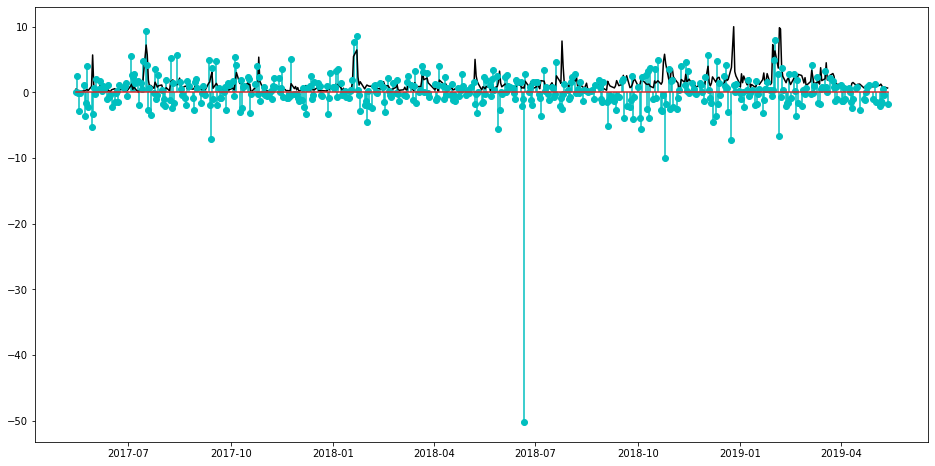

In [10]:
# plot of Daily volume vs stem plot of daily return

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
trad_vol=scale.fit_transform(data1['Total Traded Quantity'].values.reshape(-1,1))
trad_vol=trad_vol.flatten()
data1['volume scaled']=pd.Series(trad_vol,index=data1.index)

plt.figure(figsize=(16, 8))
ax=plt.subplot()
ax.plot(data1.index,data1['volume scaled']*10,color='k')
ax.stem(data1.index,data1['Day_Perc_Change'],'c','co',use_line_collection=True)

'''plot of Daily volume vs stem plot of daily return shows that whenever there is large change in daily return the number of trades is also increased '''



Text(0.5, 1.0, 'Trend')

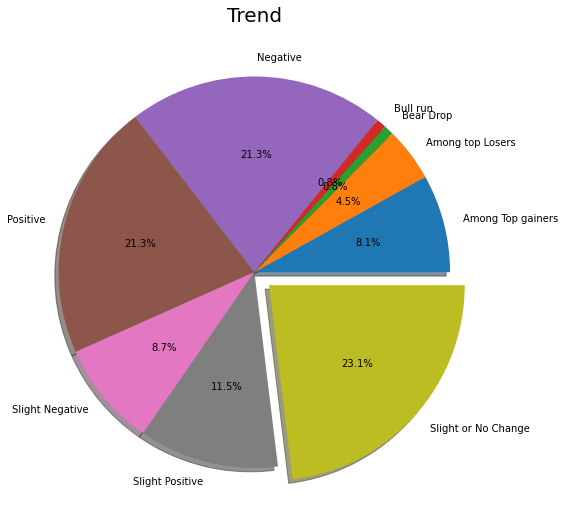

In [11]:
# pie chart of Trend column to know the relative frequency of each trend

tr=data1['Trend'].groupby(data1['Trend'])

a=[]
for e in tr.count():
    if(e==tr.count().max()):
        a.append(0.1)
    else:
        a.append(0)
        
plt.figure(figsize=(15, 9))
plt.pie((tr.count()/len(data1))*100,labels=tr.groups.keys(),autopct='%1.1f%%',
        shadow=True,explode=a)
plt.title('Trend',fontsize=20)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000259A7D26E50>,
      dtype=object)

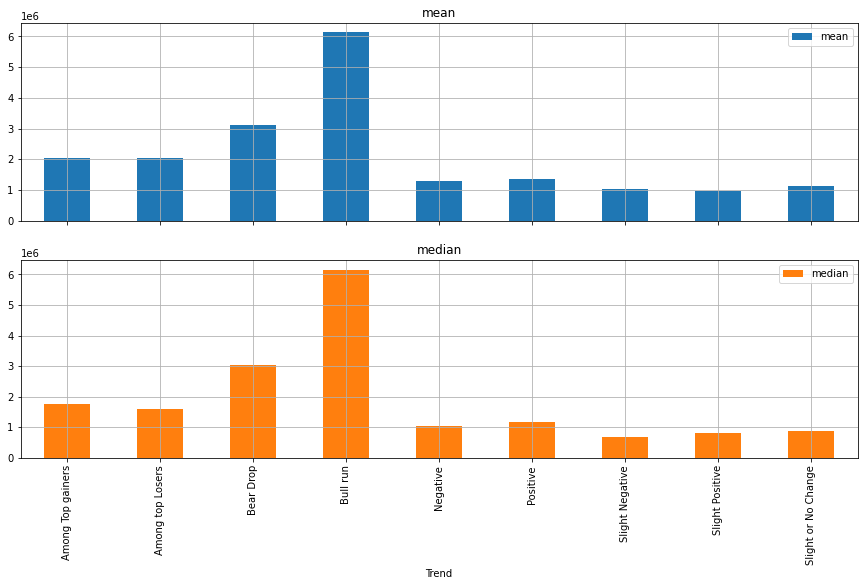

In [12]:
# plot of average and median of Total Traded Quantity by Trend type

gr=data1['Total Traded Quantity'].groupby(data1['Trend']).agg(['mean','median'])

gr.plot(kind='bar',subplots=True,grid=True,figsize=(15,8))


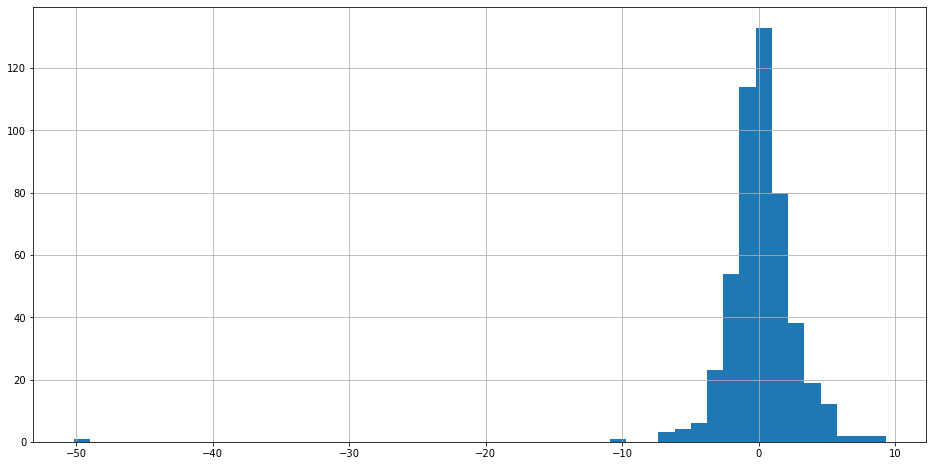

In [13]:
# plot of Daily return histogram

plt.figure(figsize=(16, 8))
data1['Day_Perc_Change'].hist(bins=50)


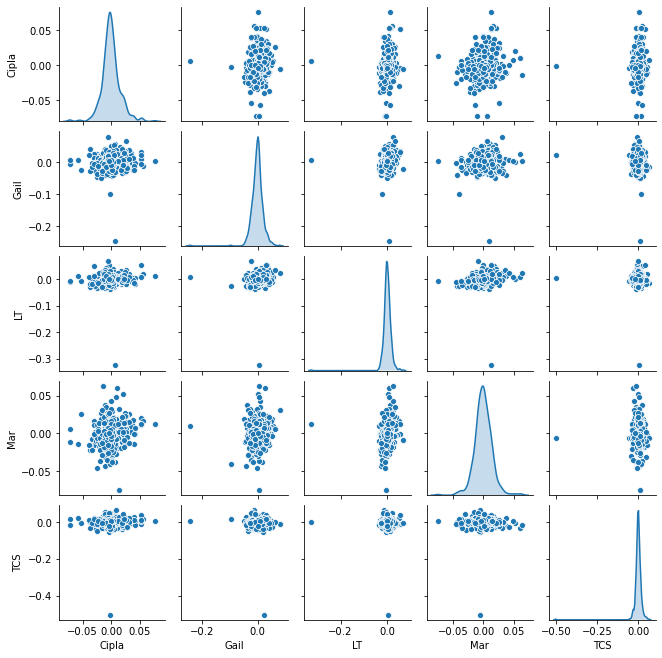

In [15]:
# analyzing the correlation behaviour of different stocks

cipla=pd.read_csv('CIPLA.csv')
gail=pd.read_csv('GAIL.csv')
lt=pd.read_csv('LT.csv')
mar=pd.read_csv('MARUTI.csv')
tcs=pd.read_csv('TCS.csv')


cipla['Series'].value_counts()
gail['Series'].value_counts()
lt['Series'].value_counts()
mar['Series'].value_counts()
tcs['Series'].value_counts()

cipla=cipla[cipla.Series!='BL']
gail=gail[gail.Series!='BL']
lt=lt[lt.Series!='BL']
mar=mar[mar.Series!='BL']
tcs=tcs[tcs.Series!='BL']


d=pd.DataFrame({'Cipla':cipla['Close Price'].to_numpy(),
              'Gail':gail['Close Price'].to_numpy(),
              'LT':lt['Close Price'].to_numpy(),
              'Mar':mar['Close Price'].to_numpy(),
              'TCS':tcs['Close Price'].to_numpy()})

d_chg=d.pct_change().dropna()

sns.pairplot(d_chg,diag_kind='kde',height=1.8)




In [16]:
d_chg.corr()

,Cipla,Gail,LT,Mar,TCS
Cipla,1.000000,0.087557,0.084751,0.177188,0.047844
Gail,0.087557,1.000000,0.127500,0.112780,-0.078614
LT,0.084751,0.127500,1.000000,0.193260,0.012789
Mar,0.177188,0.112780,0.193260,1.000000,0.008727
TCS,0.047844,-0.078614,0.012789,0.008727,1.000000


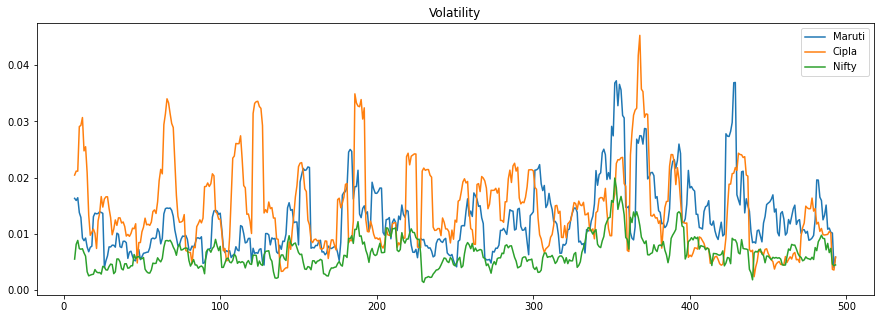

In [20]:
# analyzing the volatility of Maruti , Cipla and Nifty Index

roll_vol=d_chg.rolling(7).std()

nif=pd.read_csv('Nifty50.csv')
nif_perc_chg=nif['Close'].pct_change().dropna()
nif_vol=nif_perc_chg.rolling(7).std()

plt.figure(figsize=(15,5))
roll_vol['Mar'].plot(kind='line',label='Maruti',title='Volatility')
plt.legend(loc='best')

roll_vol['Cipla'].plot(kind='line',label='Cipla')
plt.legend(loc='best')

nif_vol.plot(kind='line',label='Nifty')
plt.legend(loc='best')


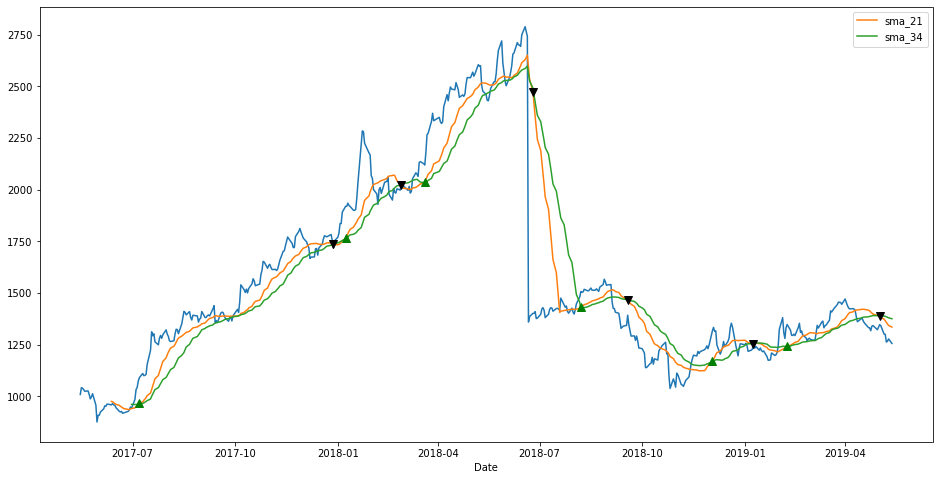

In [21]:
# Trade calls using SMA

data1['sma_21']=data1['Average Price'].rolling(21).mean()
data1['sma_34']=data1['Average Price'].rolling(34).mean()

def cross(values):
    l=[]
    were = values[0]
    for i,e in enumerate(values):
        if(were==e):
            l.append(0)
        else:
            l.append(1)
            were=e
    return l

condition=data1['sma_21']>data1['sma_34']
change=np.array(cross(condition.values))
change=data1['sma_21'].where(change==1)
data1['buy']=change.where(data1['sma_21']>data1['sma_34'])
data1['sell']=change.where(data1['sma_21']<data1['sma_34'])

plt.figure(figsize=(16, 8))
ax=plt.subplot()
ax.plot(data1['Average Price'])
ax.plot(data1['sma_21'],label='sma_21')
ax.plot(data1['sma_34'],label='sma_34')
ax.plot(data1['buy'],'g^',markersize=8)
ax.plot(data1['sell'],'kv',markersize=8)
plt.xlabel('Date')
plt.legend()


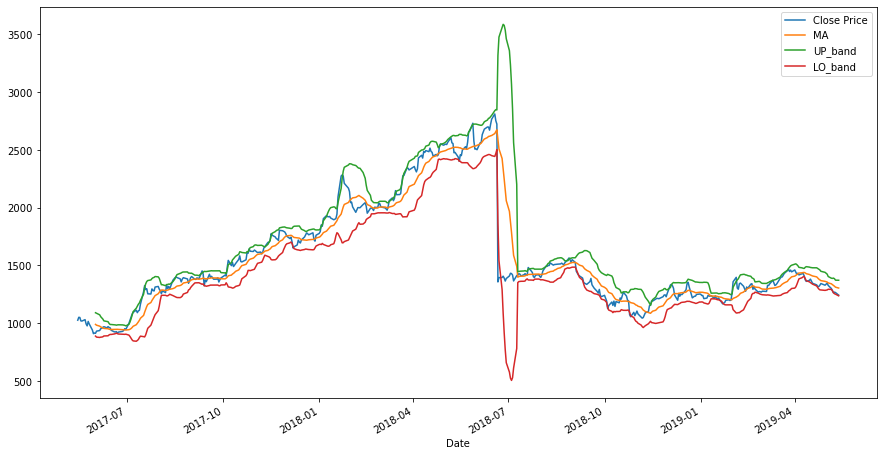

In [22]:
#Trade calls using Bollinger band

data1['MA']=data1['Close Price'].rolling(14).mean()
data1['MA_std']=data1['Close Price'].rolling(14).std()

data1['UP_band']=data1['MA']+2*data1['MA_std']
data1['LO_band']=data1['MA']-2*data1['MA_std']

data1[['Close Price','MA','UP_band','LO_band']].plot(figsize=(15,8))


In [ ]:
# saving the csv

data1.to_csv('week3.csv')
